In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing important packages for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Importing important packages for Quadratic Discrimiant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Importing important packages for Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import cross_val_predict

In [2]:
def stat_and_detailed_data(df):
    #Top 5 values of dataset
    top5 = df.head(5)
    print("Top 5 records of dataset : \n", top5)
    
    #Below 5 values of dataset
    below5 = df.tail(5)
    print("Below 5 records of dataset : \n", below5)
    
    #Summary of dataset
    print("\nSummary of dataset : ")
    summ_dataset = df.info()
    
    #Statistical information of dataset
    stat_info = df.describe()
    print("\nStatistical information of dataset : \n", stat_info)

In [3]:
def plot_2d_points(df):
    df0 = df[df['label'] == 0]
    df1 = df[df['label'] == 1]
    plt.scatter(df0.iloc[:,0], df0.iloc[:,1],
           c=['red'],
           marker='+',
           linewidths=0.5)

    plt.scatter(df1.iloc[:,0], df1.iloc[:,1],
               c=['blue'],
               marker='*',
               linewidths=0.5)
    
    plt.legend(['Label 0', 'Label 1'])
    
    plt.show

In [4]:
def print_all_scores(y_test, y_pred, model_name, dataset_name):
    
    print("Classification Report and all 5 major metrics for {} data with {} model".format(dataset_name, model_name))
    
    # print classification report
    print("Classification Report: \n",classification_report(y_test, y_pred))

    # print confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix: ", conf_mat)

    tn, fp, fn, tp = conf_mat.ravel()
    ppv = tp / (tp + fp)
    print("\nPositive Predictive Value : ", ppv)

    npv = tn / (tn + fn)
    print("\nNegative Predictive Value :", npv)

    sensitivity = tp / (tp+fn)
    print("\nSensitivity : ", sensitivity)

    specificity = tn / (tn+fp)
    print("\nSpecificity : ", specificity)

    acc = accuracy_score(y_test, y_pred)
    print("\nAccuracy of Model : ", acc*100,"%")

## Read Datasets

In [5]:
#change the path as per your environment
dataset_path="SampleDatasets/"

In [6]:
def read_datasets():
    circle_df = pd.read_csv(dataset_path+"circles0.3.csv")
    moon_df = pd.read_csv(dataset_path+"moons1.csv")
    gaussian_df = pd.read_csv(dataset_path+"twogaussians42.csv")
    halfkernel_df = pd.read_csv(dataset_path+"halfkernel.csv")
    spiral_df = pd.read_csv(dataset_path+"spiral1.csv")
    return circle_df,moon_df,gaussian_df,halfkernel_df,spiral_df

In [7]:
circle_df,moon_df,gaussian_df,halfkernel_df,spiral_df =read_datasets()

### a. Circles0.3

In [8]:
stat_and_detailed_data(circle_df)

Top 5 records of dataset : 
          x1        x2  label
0 -1.047089  0.149405      0
1 -0.417893 -0.064341      1
2 -0.873634  0.810346      0
3 -0.845811  0.439035      0
4  0.844557  0.484532      0
Below 5 records of dataset : 
            x1        x2  label
995 -0.913134 -0.309734      0
996 -0.840221 -0.869515      0
997  0.185978 -0.099436      1
998 -0.341822 -0.117213      1
999 -0.837367 -0.679239      0

Summary of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB

Statistical information of dataset : 
                 x1           x2       label
count  1000.000000  1000.000000  1000.00000
mean     -0.001126    -0.000579     0.50000
std       0.529914     0.527955     0.50025


### b. Halfkernel

In [9]:
stat_and_detailed_data(halfkernel_df)

Top 5 records of dataset : 
      x1     x2  label
0 -2.93  -9.01      0
1 -9.33  11.40      0
2 -3.36   4.51      0
3 -7.29  10.40      0
4 -9.72 -12.00      0
Below 5 records of dataset : 
         x1     x2  label
995 -13.30 -20.10      1
996  12.10  -4.98      1
997 -16.50 -21.60      1
998   9.44  11.00      1
999 -18.90  23.20      1

Summary of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB

Statistical information of dataset : 
                 x1           x2       label
count  1000.000000  1000.000000  1000.00000
mean     -3.162222    -0.084438     0.50000
std      10.287057    12.533138     0.50025
min     -21.900000   -23.200000     0.00000
25%     -11.500000   -10.600000   

### c. Moon1

In [10]:
stat_and_detailed_data(moon_df)

Top 5 records of dataset : 
          x1        x2  label
0 -0.674481  0.469321      0
1  0.566712 -0.284153      1
2 -0.257384  0.230913      1
3  1.868980  0.610969      1
4 -0.579194  0.842457      0
Below 5 records of dataset : 
            x1        x2  label
995 -0.761868  0.681011      0
996  0.995435  0.154483      0
997  1.760026 -0.051983      1
998  0.771192 -0.460564      1
999  0.410518 -0.480132      1

Summary of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB

Statistical information of dataset : 
                 x1           x2       label
count  1000.000000  1000.000000  1000.00000
mean      0.502575     0.252113     0.50000
std       0.870595     0.507203     0.50025


### c. Spiral1

In [11]:
stat_and_detailed_data(spiral_df)

Top 5 records of dataset : 
          x         y  label
0 -1.60023   7.69407    0.0
1  7.03777   9.76350    1.0
2  9.29608  -9.16002    0.0
3  3.95189  12.31531    1.0
4  0.56410   4.34127    0.0
Below 5 records of dataset : 
             x         y  label
995  14.23334  -2.59433    0.0
996   1.54775  10.99383    1.0
997   8.59973   2.69069    1.0
998  -7.24296   3.13314    0.0
999   7.24604 -10.25400    0.0

Summary of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   label   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB

Statistical information of dataset : 
                  x            y       label
count  1000.000000  1000.000000  1000.00000
mean      0.031292    -0.067469     0.50000
std       8.577650     8.405857     0.50025
min     -17.7341

### d. Twogaussian42

In [12]:
stat_and_detailed_data(gaussian_df)

Top 5 records of dataset : 
          x1        x2  label
0  0.601034  1.535353      1
1  0.755945 -1.172352      0
2  1.354479 -0.948528      0
3  3.103090  0.233485      0
4  0.753178  0.787514      1
Below 5 records of dataset : 
            x1        x2  label
995  1.713939  0.451639      1
996  1.509473 -0.794996      0
997  2.844315  0.211294      1
998 -0.025876  1.619258      1
999  3.641478  0.756925      0

Summary of dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB

Statistical information of dataset : 
                 x1           x2        label
count  1000.000000  1000.000000  1000.000000
mean      1.025840    -0.012693     0.499000
std       1.071457     1.225378     0.500

## Plot the points

#### Circles0.3

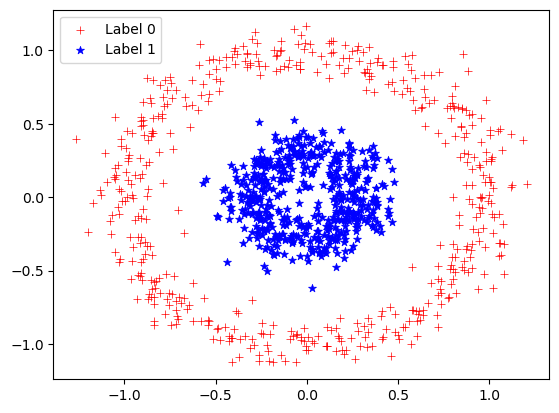

In [13]:
plot_2d_points(circle_df)

#### HalfKernel

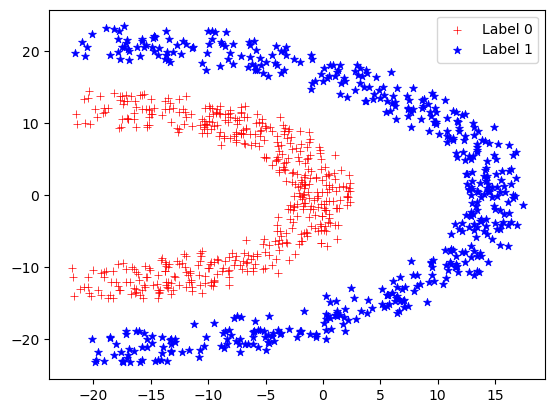

In [14]:
plot_2d_points(halfkernel_df)

#### Moon

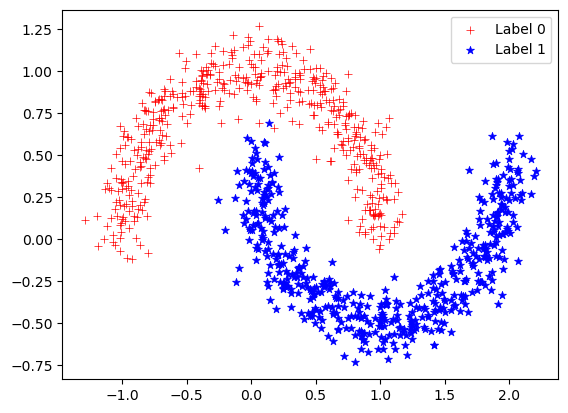

In [15]:
plot_2d_points(moon_df)

#### Spiral

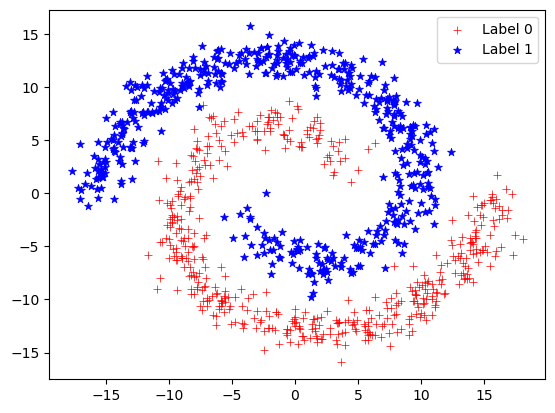

In [16]:
plot_2d_points(spiral_df)

#### Twogaussian42

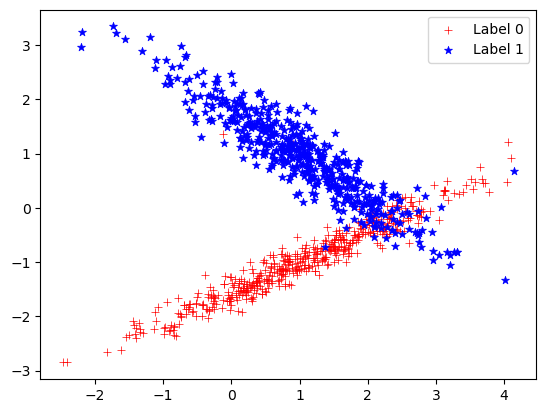

In [17]:
plot_2d_points(gaussian_df)

## Analyse different models

### 1. Linear Discriminant Analysis Classifier

In [18]:
def lda_classifier(df,dataset_name):
    
    # Dividing the dataset into class and target variable
    X = df.iloc[:, 0:2].values
    y = df.iloc[:, 2].values
    
    # Spliting the data set into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Instantiating the LDA model and using svd solver along with other hyper parameteres for tuning
    lda = LinearDiscriminantAnalysis(solver='svd',  store_covariance=True, n_components=None, tol=0.0001)#svd,eigen,lsqr

    # Applying 10-fold cross validation  as per requirement and predicting on the training set
    y_pred = cross_val_predict(lda, X_train, y_train, cv=10)
    
    print_all_scores(y_train, y_pred, "Linear Discriminant Analysis",dataset_name)
    

In [19]:
lda_classifier(circle_df,"circles0.3.csv")
lda_classifier(moon_df,"moons1.csv")
lda_classifier(gaussian_df,"twogaussian42.csv")
lda_classifier(halfkernel_df,"halfkernel.csv")
lda_classifier(spiral_df,"spira1.csv")

Classification Report and all 5 major metrics for circles0.3.csv data with Linear Discriminant Analysis model
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.64      0.52       403
           1       0.31      0.17      0.22       397

    accuracy                           0.41       800
   macro avg       0.38      0.40      0.37       800
weighted avg       0.38      0.41      0.37       800


Confusion Matrix:  [[259 144]
 [331  66]]

Positive Predictive Value :  0.3142857142857143

Negative Predictive Value : 0.43898305084745765

Sensitivity :  0.16624685138539042

Specificity :  0.6426799007444168

Accuracy of Model :  40.625 %
Classification Report and all 5 major metrics for moons1.csv data with Linear Discriminant Analysis model
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       400
           1       0.88      0.88      0.88       400



### 2. Quadratic Discriminant Analysis Classifier

In [20]:
def qda_classifier(df,dataset_name):
    # Dividing the dataset into class and target variable
    X = df.iloc[:, 0:2].values
    y = df.iloc[:, 2].values

    #Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #Calling the QDA model
    qda = QuadraticDiscriminantAnalysis()

    # Apply 10-fold cross validation and predict on the training set
    y_pred = cross_val_predict(qda, X_train, y_train, cv=10)
    
    print_all_scores(y_train, y_pred, "Linear Discriminant Analysis",dataset_name)#"circles0.3.csv")
    

In [21]:
qda_classifier(circle_df,"circles0.3.csv")
qda_classifier(moon_df,"moons1.csv")
qda_classifier(gaussian_df,"twogaussian42.csv")
qda_classifier(halfkernel_df,"halfkernel.csv")
qda_classifier(spiral_df,"spira1.csv")

Classification Report and all 5 major metrics for circles0.3.csv data with Linear Discriminant Analysis model
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       403
           1       1.00      0.98      0.99       397

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800


Confusion Matrix:  [[403   0]
 [  7 390]]

Positive Predictive Value :  1.0

Negative Predictive Value : 0.9829268292682927

Sensitivity :  0.982367758186398

Specificity :  1.0

Accuracy of Model :  99.125 %
Classification Report and all 5 major metrics for moons1.csv data with Linear Discriminant Analysis model
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       400
           1       0.88      0.88      0.88       400

    accuracy                     

### 3. Naive Bayes Classifier

In [22]:
def naive_bayes_classifier(X_train,y_train):
    gnb = GaussianNB()
    
    #Fit the model
    gnb.fit(X_train, y_train)
    
    #10 fold Cross Validation
    y_pred = cross_val_predict(gnb, X_test, y_test, cv=10)
    
    return y_pred

#### Circle Dataset

In [23]:
#Storing input variables and labels of Circle dataset in different variables
X = circle_df.iloc[:, :-1]
Y = circle_df.iloc[:, 2:3]
Y = column_or_1d(Y, warn=True)

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

C:\Users\makka\AppData\Local\Temp\ipykernel_10140\572218430.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Y = column_or_1d(Y, warn=True)


In [24]:
#Printing all 5 major metrics of the Naive Bayes Classifier model for Circle Dataset
circle_df = pd.read_csv('SampleDatasets/circles0.3.csv')
y_pred = naive_bayes_classifier(X_train, y_train)
print_all_scores(y_test, y_pred, "Gussian Naive Bayes Classifier","circles0.3.csv")

Classification Report and all 5 major metrics for circles0.3.csv data with Gussian Naive Bayes Classifier model
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.99       103

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


Confusion Matrix:  [[ 97   0]
 [  3 100]]

Positive Predictive Value :  1.0

Negative Predictive Value : 0.97

Sensitivity :  0.970873786407767

Specificity :  1.0

Accuracy of Model :  98.5 %


#### Half Kernel Dataset

In [25]:
#Storing input variables and labels of halfkernel dataset in different variables
X = halfkernel_df.iloc[:, :-1]
Y = halfkernel_df.iloc[:, 2:3]
Y = column_or_1d(Y, warn=True)

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

C:\Users\makka\AppData\Local\Temp\ipykernel_10140\1216107748.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Y = column_or_1d(Y, warn=True)


In [26]:
#Printing all 5 major metrics of the Naive Bayes Classifier model for Halfkernel Dataset
#df = pd.read_csv('SampleDatasets/halfkernel.csv')
y_pred = naive_bayes_classifier(X_train, y_train)
print_all_scores(y_test, y_pred, "Gaussian Naive Bayes Classifier","halfkernel.csv")

Classification Report and all 5 major metrics for halfkernel.csv data with Gaussian Naive Bayes Classifier model
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        98
           1       0.95      0.87      0.91       102

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200


Confusion Matrix:  [[93  5]
 [13 89]]

Positive Predictive Value :  0.9468085106382979

Negative Predictive Value : 0.8773584905660378

Sensitivity :  0.8725490196078431

Specificity :  0.9489795918367347

Accuracy of Model :  91.0 %


#### Moons Dataset

In [27]:
#Storing input variables and labels of Moons dataset in different variables
X = moon_df.iloc[:, :-1]
Y = moon_df.iloc[:, 2:3]
Y = column_or_1d(Y, warn=True)

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

C:\Users\makka\AppData\Local\Temp\ipykernel_10140\1809455280.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Y = column_or_1d(Y, warn=True)


In [28]:
#Printing all 5 major metrics of the Naive Bayes Classifier model for Moons Dataset
#df = pd.read_csv('SampleDatasets/moons1.csv')
y_pred = naive_bayes_classifier(X_train, y_train)
print_all_scores(y_test, y_pred, "Gussian Naive Bayes Classifier","moons1.csv")

Classification Report and all 5 major metrics for moons1.csv data with Gussian Naive Bayes Classifier model
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.88      0.87      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200


Confusion Matrix:  [[88 12]
 [13 87]]

Positive Predictive Value :  0.8787878787878788

Negative Predictive Value : 0.8712871287128713

Sensitivity :  0.87

Specificity :  0.88

Accuracy of Model :  87.5 %


#### Spiral Dataset

In [29]:
#Storing input variables and labels of Spiral dataset in different variables
X = spiral_df.iloc[:, :-1]
Y = spiral_df.iloc[:, 2:3]
Y = column_or_1d(Y, warn=True)

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

C:\Users\makka\AppData\Local\Temp\ipykernel_10140\154587866.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Y = column_or_1d(Y, warn=True)


In [30]:
#Printing all 5 major metrics of the Naive Bayes Classifier model for Spiral Dataset
#df = pd.read_csv('SampleDatasets/spiral1.csv')
y_pred = naive_bayes_classifier(X_train, y_train)
print_all_scores(y_test, y_pred, "Gussian Naive Bayes Classifier","spira1.csv")

Classification Report and all 5 major metrics for spira1.csv data with Gussian Naive Bayes Classifier model
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        94
         1.0       0.72      0.72      0.72       106

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200


Confusion Matrix:  [[64 30]
 [30 76]]

Positive Predictive Value :  0.7169811320754716

Negative Predictive Value : 0.6808510638297872

Sensitivity :  0.7169811320754716

Specificity :  0.6808510638297872

Accuracy of Model :  70.0 %


#### TwoGaussians42 Datasets

In [31]:
#Storing input variables and labels of TwoGaussians42 dataset in different variables
X = gaussian_df.iloc[:, :-1]
Y = gaussian_df.iloc[:, 2:3]
Y = column_or_1d(Y, warn=True)

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

C:\Users\makka\AppData\Local\Temp\ipykernel_10140\3757327881.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Y = column_or_1d(Y, warn=True)


In [32]:
#Printing all 5 major metrics of the Naive Bayes Classifier model for TwoGaussians42 Dataset
#df = pd.read_csv('SampleDatasets/twogaussians42.csv')
y_pred = naive_bayes_classifier(X_train, y_train)
print_all_scores(y_test, y_pred, "Gussian Naive Bayes Classifier","twogaussians42.csv")

Classification Report and all 5 major metrics for twogaussians42.csv data with Gussian Naive Bayes Classifier model
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       103
           1       0.90      0.88      0.89        97

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200


Confusion Matrix:  [[94  9]
 [12 85]]

Positive Predictive Value :  0.9042553191489362

Negative Predictive Value : 0.8867924528301887

Sensitivity :  0.8762886597938144

Specificity :  0.912621359223301

Accuracy of Model :  89.5 %


### 4. Support Vector Machines

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

**Function for training SVC model and finding which kernel works best for the data along with 10 fold cross validation using GridSearchCV**

In [34]:
def get_best_svc_model(X_train,y_train, param_dict):
    #Creating SVC model object
    svc=SVC(random_state=0)

    # Defining Grid search for all parameters values with 10 fold cross validation
    clf = GridSearchCV(SVC(), param_dict, refit = True, cv=10, verbose = 3)

    #Fitting the model
    clf.fit(X_train, y_train)
    
    return clf

#### a. circles0.3 dataset

In [35]:
X=circle_df.drop('label', axis='columns')
Y=circle_df['label']

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#Defining different parameters values
param_dict = {
#               'C': [0.1, 1, 10, 100], 
#               'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid']} 

clf = get_best_svc_model(X_train, y_train, param_dict)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 2/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 3/10] END ....................kernel=linear;, score=0.662 total time=   0.0s
[CV 4/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 5/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 6/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 7/10] END ....................kernel=linear;, score=0.500 total time=   0.0s
[CV 8/10] END ....................kernel=linear;, score=0.600 total time=   0.0s
[CV 9/10] END ....................kernel=linear;, score=0.650 total time=   0.0s
[CV 10/10] END ...................kernel=linear;, score=0.600 total time=   0.0s
[CV 1/10] END ......................kernel=poly;, score=0.625 total time=   0.0s
[CV 2/10] END ......................kernel=poly;

In [36]:
# print best parameter after tuning
best_kernel=clf.best_params_.get("kernel")
print(best_kernel)

rbf


In [37]:
#Storing the prediction made on test data
y_pred = clf.predict(X_test)
#Printing all scores
print_all_scores(y_test, y_pred, f"SVM(kernel={best_kernel})", "circles0.3")

Classification Report and all 5 major metrics for circles0.3 data with SVM(kernel=rbf) model
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:  [[ 97   0]
 [  0 103]]

Positive Predictive Value :  1.0

Negative Predictive Value : 1.0

Sensitivity :  1.0

Specificity :  1.0

Accuracy of Model :  100.0 %


#### b. halfkernel dataset

In [38]:
X=halfkernel_df.drop('label', axis='columns')
Y=halfkernel_df['label']

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#Defining different parameters values
param_dict = {
#               'C': [0.1, 1, 10, 100], 
#               'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid']} 

clf = get_best_svc_model(X_train, y_train, param_dict)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................kernel=linear;, score=0.762 total time=   0.0s
[CV 2/10] END ....................kernel=linear;, score=0.725 total time=   0.0s
[CV 3/10] END ....................kernel=linear;, score=0.688 total time=   0.0s
[CV 4/10] END ....................kernel=linear;, score=0.725 total time=   0.0s
[CV 5/10] END ....................kernel=linear;, score=0.762 total time=   0.0s
[CV 6/10] END ....................kernel=linear;, score=0.787 total time=   0.0s
[CV 7/10] END ....................kernel=linear;, score=0.787 total time=   0.0s
[CV 8/10] END ....................kernel=linear;, score=0.625 total time=   0.0s
[CV 9/10] END ....................kernel=linear;, score=0.738 total time=   0.0s
[CV 10/10] END ...................kernel=linear;, score=0.775 total time=   0.0s
[CV 1/10] END ......................kernel=poly;, score=0.850 total time=   0.0s
[CV 2/10] END ......................kernel=poly;

In [39]:
# print best parameter after tuning
best_kernel=clf.best_params_.get("kernel")
print(best_kernel)

rbf


In [40]:
#Storing the prediction made on test data
y_pred = clf.predict(X_test)
#Printing all scores
print_all_scores(y_test, y_pred, f"SVM(kernel={best_kernel})", "halfkernel")

Classification Report and all 5 major metrics for halfkernel data with SVM(kernel=rbf) model
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:  [[ 98   0]
 [  0 102]]

Positive Predictive Value :  1.0

Negative Predictive Value : 1.0

Sensitivity :  1.0

Specificity :  1.0

Accuracy of Model :  100.0 %


#### c. moons1 dataset

In [41]:
X=moon_df.drop('label', axis='columns')
Y=moon_df['label']

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#Defining different parameters values
param_dict = {
#               'C': [0.1, 1, 10, 100], 
#               'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid']} 

clf = get_best_svc_model(X_train, y_train, param_dict)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 2/10] END ....................kernel=linear;, score=0.887 total time=   0.0s
[CV 3/10] END ....................kernel=linear;, score=0.887 total time=   0.0s
[CV 4/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 5/10] END ....................kernel=linear;, score=0.838 total time=   0.0s
[CV 6/10] END ....................kernel=linear;, score=0.850 total time=   0.0s
[CV 7/10] END ....................kernel=linear;, score=0.863 total time=   0.0s
[CV 8/10] END ....................kernel=linear;, score=0.887 total time=   0.0s
[CV 9/10] END ....................kernel=linear;, score=0.863 total time=   0.0s
[CV 10/10] END ...................kernel=linear;, score=0.887 total time=   0.0s
[CV 1/10] END ......................kernel=poly;, score=0.963 total time=   0.0s
[CV 2/10] END ......................kernel=poly;

In [42]:
# print best parameter after tuning
best_kernel=clf.best_params_.get("kernel")
print(best_kernel)

rbf


In [43]:
#Storing the prediction made on test data
y_pred = clf.predict(X_test)
#Printing all scores
print_all_scores(y_test, y_pred, f"SVM(kernel={best_kernel})", "moons1")

Classification Report and all 5 major metrics for moons1 data with SVM(kernel=rbf) model
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:  [[100   0]
 [  0 100]]

Positive Predictive Value :  1.0

Negative Predictive Value : 1.0

Sensitivity :  1.0

Specificity :  1.0

Accuracy of Model :  100.0 %


#### d. spiral1 dataset

In [44]:
X=spiral_df.drop('label', axis='columns')
Y=spiral_df['label']

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#Defining different parameters values
param_dict = {
#               'C': [0.1, 1, 10, 100], 
#               'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid']} 

clf = get_best_svc_model(X_train, y_train, param_dict)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................kernel=linear;, score=0.700 total time=   0.0s
[CV 2/10] END ....................kernel=linear;, score=0.738 total time=   0.0s
[CV 3/10] END ....................kernel=linear;, score=0.800 total time=   0.0s
[CV 4/10] END ....................kernel=linear;, score=0.750 total time=   0.0s
[CV 5/10] END ....................kernel=linear;, score=0.725 total time=   0.0s
[CV 6/10] END ....................kernel=linear;, score=0.762 total time=   0.0s
[CV 7/10] END ....................kernel=linear;, score=0.762 total time=   0.0s
[CV 8/10] END ....................kernel=linear;, score=0.713 total time=   0.0s
[CV 9/10] END ....................kernel=linear;, score=0.750 total time=   0.0s
[CV 10/10] END ...................kernel=linear;, score=0.787 total time=   0.0s
[CV 1/10] END ......................kernel=poly;, score=0.713 total time=   0.0s
[CV 2/10] END ......................kernel=poly;

In [45]:
# print best parameter after tuning
best_kernel=clf.best_params_.get("kernel")
print(best_kernel)

rbf


In [46]:
#Storing the prediction made on test data
y_pred = clf.predict(X_test)
#Printing all scores
print_all_scores(y_test, y_pred, f"SVM(kernel={best_kernel})", "spiral1")

Classification Report and all 5 major metrics for spiral1 data with SVM(kernel=rbf) model
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        94
         1.0       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


Confusion Matrix:  [[ 94   0]
 [  3 103]]

Positive Predictive Value :  1.0

Negative Predictive Value : 0.9690721649484536

Sensitivity :  0.9716981132075472

Specificity :  1.0

Accuracy of Model :  98.5 %


#### e. twogaussians42 dataset

In [47]:
X=gaussian_df.drop('label', axis='columns')
Y=gaussian_df['label']

#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#Defining different parameters values
param_dict = {
#               'C': [0.1, 1, 10, 100], 
#               'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid']} 

clf = get_best_svc_model(X_train, y_train, param_dict)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 2/10] END ....................kernel=linear;, score=0.900 total time=   0.0s
[CV 3/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 4/10] END ....................kernel=linear;, score=0.887 total time=   0.0s
[CV 5/10] END ....................kernel=linear;, score=0.938 total time=   0.0s
[CV 6/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 7/10] END ....................kernel=linear;, score=0.950 total time=   0.0s
[CV 8/10] END ....................kernel=linear;, score=0.912 total time=   0.0s
[CV 9/10] END ....................kernel=linear;, score=0.988 total time=   0.0s
[CV 10/10] END ...................kernel=linear;, score=0.938 total time=   0.0s
[CV 1/10] END ......................kernel=poly;, score=0.900 total time=   0.0s
[CV 2/10] END ......................kernel=poly;

In [48]:
# print best parameter after tuning
best_kernel=clf.best_params_.get("kernel")
print(best_kernel)

rbf


In [49]:
#Storing the prediction made on test data
y_pred = clf.predict(X_test)
#Printing all scores
print_all_scores(y_test, y_pred, f"SVM(kernel={best_kernel})", "twogaussian42")

Classification Report and all 5 major metrics for twogaussian42 data with SVM(kernel=rbf) model
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       103
           1       1.00      0.90      0.95        97

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Confusion Matrix:  [[103   0]
 [ 10  87]]

Positive Predictive Value :  1.0

Negative Predictive Value : 0.911504424778761

Sensitivity :  0.8969072164948454

Specificity :  1.0

Accuracy of Model :  95.0 %
